In [1]:
import nltk

In [2]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  l



Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.............. Chat-80 Data Files
  [ ] city_database....... City Database
  [ ] cmudict............. The Carnegie Mellon Pronouncing Dictionary (0.6)
  [ ] comparative_sentences Comparative Sentence Dataset
  [ ] comtrans............ ComTrans Corpus Sample


Hit Enter to continue:  


  [ ] conll2007........... Dependency Treebanks from CoNLL 2007 (Catalan
                           and Basque Subset)
  [ ] crubadan............ Crubadan Corpus
  [ ] dependency_treebank. Dependency Parsed Treebank
  [ ] dolch............... Dolch Word List
  [ ] europarl_raw........ Sample European Parliament Proceedings Parallel
                           Corpus
  [ ] floresta............ Portuguese Treebank
  [ ] framenet_v15........ FrameNet 1.5
  [ ] framenet_v17........ FrameNet 1.7
  [ ] gazetteers.......... Gazeteer Lists
  [ ] genesis............. Genesis Corpus
  [ ] gutenberg........... Project Gutenberg Selections
  [ ] ieer................ NIST IE-ER DATA SAMPLE
  [ ] inaugural........... C-Span Inaugural Address Corpus
  [ ] indian.............. Indian Language POS-Tagged Corpus
  [ ] jeita............... JEITA Public Morphologically Tagged Corpus (in
                           ChaSen format)
  [ ] kimmo............... PC-KIMMO Data Files
  [ ] knbc................ KNB C

Hit Enter to continue:  


  [ ] lin_thesaurus....... Lin's Dependency Thesaurus
  [ ] mac_morpho.......... MAC-MORPHO: Brazilian Portuguese news text with
                           part-of-speech tags
  [ ] machado............. Machado de Assis -- Obra Completa
  [ ] masc_tagged......... MASC Tagged Corpus
  [ ] maxent_ne_chunker... ACE Named Entity Chunker (Maximum entropy)
  [ ] maxent_treebank_pos_tagger Treebank Part of Speech Tagger (Maximum entropy)
  [ ] moses_sample........ Moses Sample Models
  [ ] movie_reviews....... Sentiment Polarity Dataset Version 2.0
  [ ] mte_teip5........... MULTEXT-East 1984 annotated corpus 4.0
  [ ] mwa_ppdb............ The monolingual word aligner (Sultan et al.
                           2015) subset of the Paraphrase Database.
  [ ] names............... Names Corpus, Version 1.3 (1994-03-29)
  [ ] nombank.1.0......... NomBank Corpus 1.0
  [ ] nonbreaking_prefixes Non-Breaking Prefixes (Moses Decoder)
  [ ] nps_chat............ NPS Chat
  [ ] omw................. Open Mu

Hit Enter to continue:  


  [ ] perluniprops........ perluniprops: Index of Unicode Version 7.0.0
                           character properties in Perl
  [ ] pil................. The Patient Information Leaflet (PIL) Corpus
  [ ] pl196x.............. Polish language of the XX century sixties
  [ ] porter_test......... Porter Stemmer Test Files
  [ ] ppattach............ Prepositional Phrase Attachment Corpus
  [ ] problem_reports..... Problem Report Corpus
  [ ] product_reviews_1... Product Reviews (5 Products)
  [ ] product_reviews_2... Product Reviews (9 Products)
  [ ] propbank............ Proposition Bank Corpus 1.0
  [ ] pros_cons........... Pros and Cons
  [ ] ptb................. Penn Treebank
  [ ] punkt............... Punkt Tokenizer Models
  [ ] qc.................. Experimental Data for Question Classification
  [ ] reuters............. The Reuters-21578 benchmark corpus, ApteMod
                           version
  [ ] rslp................ RSLP Stemmer (Removedor de Sufixos da Lingua
             

Hit Enter to continue:  


  [ ] senseval............ SENSEVAL 2 Corpus: Sense Tagged Text
  [ ] sentence_polarity... Sentence Polarity Dataset v1.0
  [ ] sentiwordnet........ SentiWordNet
  [ ] shakespeare......... Shakespeare XML Corpus Sample
  [ ] sinica_treebank..... Sinica Treebank Corpus Sample
  [ ] smultron............ SMULTRON Corpus Sample
  [ ] snowball_data....... Snowball Data
  [ ] spanish_grammars.... Grammars for Spanish
  [ ] state_union......... C-Span State of the Union Address Corpus
  [ ] stopwords........... Stopwords Corpus
  [ ] subjectivity........ Subjectivity Dataset v1.0
  [ ] swadesh............. Swadesh Wordlists
  [ ] switchboard......... Switchboard Corpus Sample
  [ ] tagsets............. Help on Tagsets
  [ ] timit............... TIMIT Corpus Sample
  [ ] toolbox............. Toolbox Sample Files
  [ ] treebank............ Penn Treebank Sample
  [ ] twitter_samples..... Twitter Samples
  [ ] udhr2............... Universal Declaration of Human Rights Corpus
                     

Hit Enter to continue:  


  [ ] unicode_samples..... Unicode Samples
  [ ] universal_tagset.... Mappings to the Universal Part-of-Speech Tagset
  [ ] universal_treebanks_v20 Universal Treebanks Version 2.0
  [ ] vader_lexicon....... VADER Sentiment Lexicon
  [ ] verbnet3............ VerbNet Lexicon, Version 3.3
  [ ] verbnet............. VerbNet Lexicon, Version 2.1
  [ ] webtext............. Web Text Corpus
  [ ] wmt15_eval.......... Evaluation data from WMT15
  [ ] word2vec_sample..... Word2Vec Sample
  [ ] wordnet............. WordNet
  [ ] wordnet_ic.......... WordNet-InfoContent
  [ ] words............... Word Lists
  [ ] ycoe................ York-Toronto-Helsinki Parsed Corpus of Old
                           English Prose

Collections:
  [ ] all-corpora......... All the corpora
  [ ] all-nltk............ All packages available on nltk_data gh-pages
                           branch
  [ ] all................. All packages
  [ ] book................ Everything used in the NLTK Book
  [ ] popular..........

Hit Enter to continue:  


  [ ] tests............... Packages for running tests
  [ ] third-party......... Third-party data packages

([*] marks installed packages)

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  stopwords


Command 'stopwords' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  d



Download which package (l=list; x=cancel)?


  Identifier>  stopwords


      Unzipping corpora/stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  q


In [5]:
messages = [line.rstrip() for line in open("smsspamcollection/SMSSpamCollection")]

In [6]:
print(len(messages))

5574


In [7]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [9]:
for mess_no,message in enumerate(messages[:10]):
    print(mess_no,message)
    print("\n")

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [11]:
messages[0] # Below the \t represents the tab space between type of email and actual text

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [12]:
import pandas as pd

In [13]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['label','message'])

In [14]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [16]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [17]:
messages['length'] = messages['message'].apply(len)

In [18]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [19]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

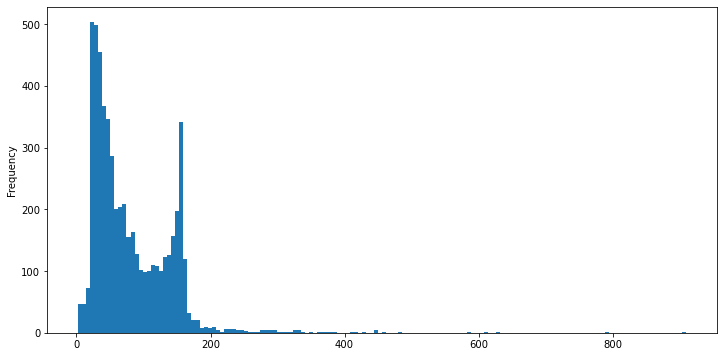

In [23]:
plt.figure(figsize=(12,6))
messages['length'].plot.hist(bins=150)

In [24]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [27]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

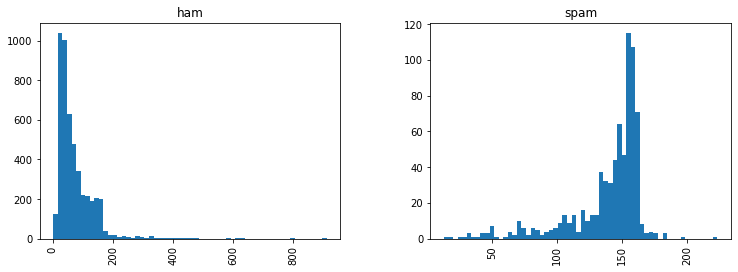

In [29]:
messages.hist(column='length',by='label',bins=60, figsize=(12,4))